In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [12]:

# Load the dataset
df = pd.read_csv('hotel_review_data_cleaned.csv')

# Vectorize the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['reviews'])
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to try
alpha_range = [0.1, 0.5, 1.0, 1.5, 2.0]

# Create a grid search object
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best alpha value
grid_search.fit(X_train, y_train)

# Get the best alpha value and corresponding model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Predict the sentiment on the testing set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Alpha:", best_alpha)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Best Alpha: 1.5
Accuracy: 0.7608256351039261
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.72      0.67      1200
           1       0.40      0.16      0.23      1134
           2       0.83      0.92      0.87      4594

    accuracy                           0.76      6928
   macro avg       0.62      0.60      0.59      6928
weighted avg       0.72      0.76      0.73      6928



Confusion Matrix:
 [[ 863  112  225]
 [ 289  183  662]
 [ 211  158 4225]]


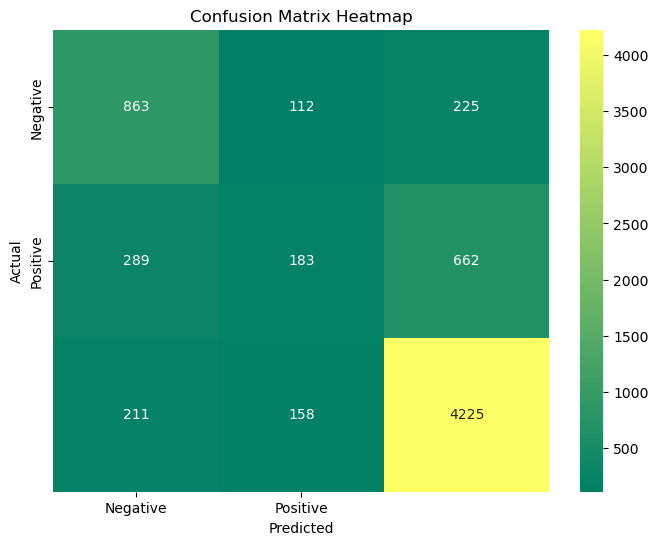

In [18]:
#Generate confusion matrix heatmap

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='summer', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()